# Table Merges

In [26]:
#! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 1.8 MB/s eta 0:00:0000:0100:04
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00:00:010:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached libclang-16.0.0-py2.py3-none-macosx_10_9_x86_64.whl (26.7 MB)
  Using cached numpy-1.23.5-cp310-cp310-macosx_10_9_x86_64.whl (18.1 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 9.9 MB/s eta 0:00:0000:01
  Using cac

In [23]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
from tensorflow.keras.utils import to_categorical

2023-06-27 12:15:19.291385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading data

In [2]:
# DATA
aircraft_df = pd.read_csv('raw_data/08_23_aircraft.csv')
engines_df = pd.read_csv('raw_data/08_23_engines.csv')
events_df = pd.read_csv('raw_data/08_23_events.csv')
flight_crew_df = pd.read_csv('raw_data/08_23_Flight_Crew.csv')
flight_time_df = pd.read_csv('raw_data/08_23_flight_time.csv')

/var/folders/bm/jkrgnvss6lj9nx3qfzmdw0_m0000gn/T/ipykernel_19827/2497987404.py:2: DtypeWarning: Columns (0,59) have mixed types. Specify dtype option on import or set low_memory=False.
  aircraft_df = pd.read_csv('raw_data/08_23_aircraft.csv')
/var/folders/bm/jkrgnvss6lj9nx3qfzmdw0_m0000gn/T/ipykernel_19827/2497987404.py:4: DtypeWarning: Columns (0,31,51) have mixed types. Specify dtype option on import or set low_memory=False.
  events_df = pd.read_csv('raw_data/08_23_events.csv')


## Selecting Columns

### Dropping nonapplicable columns

In [3]:
aircraft_df.columns

Index(['ev_id', 'Aircraft_Key', 'regis_no', 'ntsb_no', 'acft_missing',
       'far_part', 'flt_plan_filed', 'flight_plan_activated', 'damage',
       'acft_fire', 'acft_expl', 'acft_make', 'acft_model', 'acft_series',
       'acft_serial_no', 'cert_max_gr_wt', 'acft_category', 'acft_reg_cls',
       'homebuilt', 'fc_seats', 'cc_seats', 'pax_seats', 'total_seats',
       'num_eng', 'fixed_retractable', 'type_last_insp', 'date_last_insp',
       'afm_hrs_last_insp', 'afm_hrs', 'elt_install', 'elt_oper',
       'elt_aided_loc_ev', 'elt_type', 'owner_acft', 'owner_street',
       'owner_city', 'owner_state', 'owner_country', 'owner_zip',
       'oper_individual_name', 'oper_name', 'oper_same', 'oper_dba',
       'oper_addr_same', 'oper_street', 'oper_city', 'oper_state',
       'oper_country', 'oper_zip', 'oper_code', 'certs_held', 'oprtng_cert',
       'oper_cert', 'oper_cert_num', 'oper_sched', 'oper_dom_int',
       'oper_pax_cargo', 'type_fly', 'second_pilot', 'dprt_pt_same_ev',
      

In [15]:
columns = ['ev_id', 'far_part', 'flt_plan_filed', 'acft_make',  'acft_model', 'fc_seats', 'cc_seats', 'pax_seats', 'num_eng', 'fixed_retractable', 'cert_max_gr_wt', 'acft_category', 'homebuilt', 'type_last_insp', 'afm_hrs_last_insp', 'afm_hrs', 'elt_install', 'elt_type', 'oper_dba', 'certs_held', 'oprtng_cert', 'oper_cert', 'oper_cert_num', 'oper_sched', 'oper_dom_int', 'type_fly', 'second_pilot', 'dprt_apt_id', 'dprt_time', 'dest_same_local', 'dest_apt_id', 'site_seeing', 'air_medical', 'acft_year', 'fuel_on_board']

In [44]:
aircraft_df_cat = pd.DataFrame()


aircraft_df_cat[columns] = aircraft_df[columns].astype('category')
aircraft_df_cat[columns] = aircraft_df_cat[columns].apply(lambda x: x.cat.codes)

In [45]:
aircraft_df_cat.dtypes

ev_id                int16
far_part              int8
flt_plan_filed        int8
acft_make            int16
acft_model           int16
fc_seats              int8
cc_seats              int8
pax_seats            int16
num_eng               int8
fixed_retractable     int8
cert_max_gr_wt       int16
acft_category         int8
homebuilt             int8
type_last_insp        int8
afm_hrs_last_insp    int16
afm_hrs              int16
elt_install           int8
elt_type              int8
oper_dba             int16
certs_held            int8
oprtng_cert           int8
oper_cert             int8
oper_cert_num        int16
oper_sched            int8
oper_dom_int          int8
type_fly              int8
second_pilot          int8
dprt_apt_id          int16
dprt_time            int16
dest_same_local       int8
dest_apt_id          int16
site_seeing           int8
air_medical           int8
acft_year             int8
fuel_on_board        int16
dtype: object

In [47]:
aircraft_df_cat[aircraft_df_cat.columns[1:]].corr()

,far_part,flt_plan_filed,acft_make,acft_model,fc_seats,cc_seats,pax_seats,num_eng,fixed_retractable,cert_max_gr_wt,...,type_fly,second_pilot,dprt_apt_id,dprt_time,dest_same_local,dest_apt_id,site_seeing,air_medical,acft_year,fuel_on_board
far_part,1.000000,-0.400608,-0.140578,-0.081054,-0.182807,0.027694,0.029965,-0.309400,-0.004233,-0.120445,...,-0.593568,-0.207583,-0.195125,-0.357106,NaN,-0.176762,-0.387122,-0.365957,-0.224330,-0.104119
flt_plan_filed,-0.400608,1.000000,0.111175,0.081240,0.145194,-0.061276,-0.121460,0.304789,-0.096964,0.102710,...,0.508989,0.247331,0.251003,0.330394,NaN,0.231137,0.511507,0.492474,0.127540,0.072103
acft_make,-0.140578,0.111175,1.000000,0.550749,0.002740,-0.070988,-0.098827,0.006629,-0.042486,-0.086219,...,0.181428,-0.009045,0.015362,0.067526,NaN,0.015316,0.066372,0.056832,0.054203,-0.019714
acft_model,-0.081054,0.081240,0.550749,1.000000,-0.010554,-0.050941,-0.087015,-0.006252,0.023596,-0.061051,...,0.119956,-0.016909,0.014837,0.069922,NaN,0.013866,0.067813,0.049204,0.096896,-0.013374
fc_seats,-0.182807,0.145194,0.002740,-0.010554,1.000000,0.276071,0.207255,0.250636,0.110813,0.356807,...,0.131302,0.214849,0.110185,0.167001,NaN,0.103517,0.205202,0.215492,0.351153,0.366069
cc_seats,0.027694,-0.061276,-0.070988,-0.050941,0.276071,1.000000,0.542629,0.142234,0.137771,0.253705,...,-0.142344,0.120499,0.040681,0.009831,NaN,0.044211,0.040026,0.061034,0.084892,0.121283
pax_seats,0.029965,-0.121460,-0.098827,-0.087015,0.207255,0.542629,1.000000,0.214631,0.159661,0.374591,...,-0.204291,0.131399,0.025434,-0.020973,NaN,0.025935,0.001075,-0.000170,0.110059,0.093832
num_eng,-0.309400,0.304789,0.006629,-0.006252,0.250636,0.142234,0.214631,1.000000,0.205848,0.431052,...,0.248060,0.364884,0.236465,0.260387,NaN,0.216595,0.413725,0.446842,0.176388,0.201091
fixed_retractable,-0.004233,-0.096964,-0.042486,0.023596,0.110813,0.137771,0.159661,0.205848,1.000000,0.273530,...,-0.059985,0.185509,0.110226,0.027578,NaN,0.109265,0.046796,0.067994,0.003879,0.136269
cert_max_gr_wt,-0.120445,0.102710,-0.086219,-0.061051,0.356807,0.253705,0.374591,0.431052,0.273530,1.000000,...,0.026873,0.275092,0.194575,0.252390,NaN,0.180747,0.272351,0.287622,0.178718,0.374726


### Testing Multivariates

<Axes: >

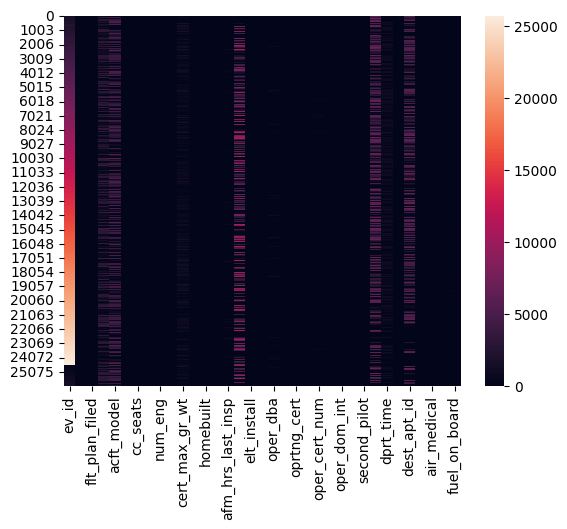

In [46]:
sns.heatmap(aircraft_df_cat)

## Exporting selected data

In [20]:
aircraft_df.to_csv('data_selection/aircraft_selection.csv', index=False)